In [8]:
import pandas as pd

df = pd.read_csv("/share/u/kevin/DiffusionConceptErasure/src/classifier_results/evaluations/evaluation_averaged.csv")
df

,erasing_type,concept,probe,clip_score,classifier_top1_acc,classifier_top5_acc
0,esdu,airliner,noisebasedprobe_cls,28.220242,100.0,100.0
1,esdu,airliner,noisebasedprobe_nocls,26.171324,0.0,100.0
2,esdu,airliner,standardpromptprobe,21.146393,0.0,0.0
3,esdu,airliner,standardpromptprobe_cls,27.016111,100.0,100.0
4,esdx,airliner,noisebasedprobe_cls,28.933096,100.0,100.0
...,...,...,...,...,...,...
107,tv,tench,standardpromptprobe_cls,28.873909,100.0,100.0
108,uce,tench,noisebasedprobe_cls,22.848724,0.0,0.0
109,uce,tench,noisebasedprobe_nocls,25.871437,0.0,0.0
110,uce,tench,standardpromptprobe,21.355333,0.0,0.0


/tmp/ipykernel_3129420/1051460754.py:19: FutureWarning: 

The `ci` parameter is deprecated. Use `errorbar='sd'` for the same effect.

  sns.barplot(


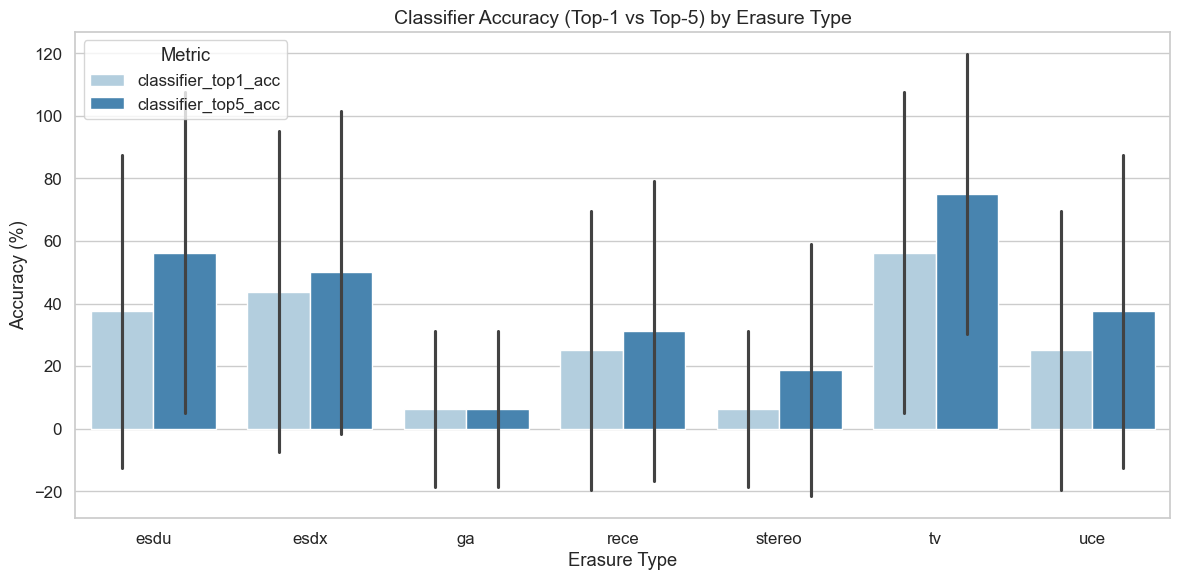

/tmp/ipykernel_3129420/1051460754.py:43: FutureWarning: 

The `ci` parameter is deprecated. Use `errorbar='sd'` for the same effect.

  sns.barplot(


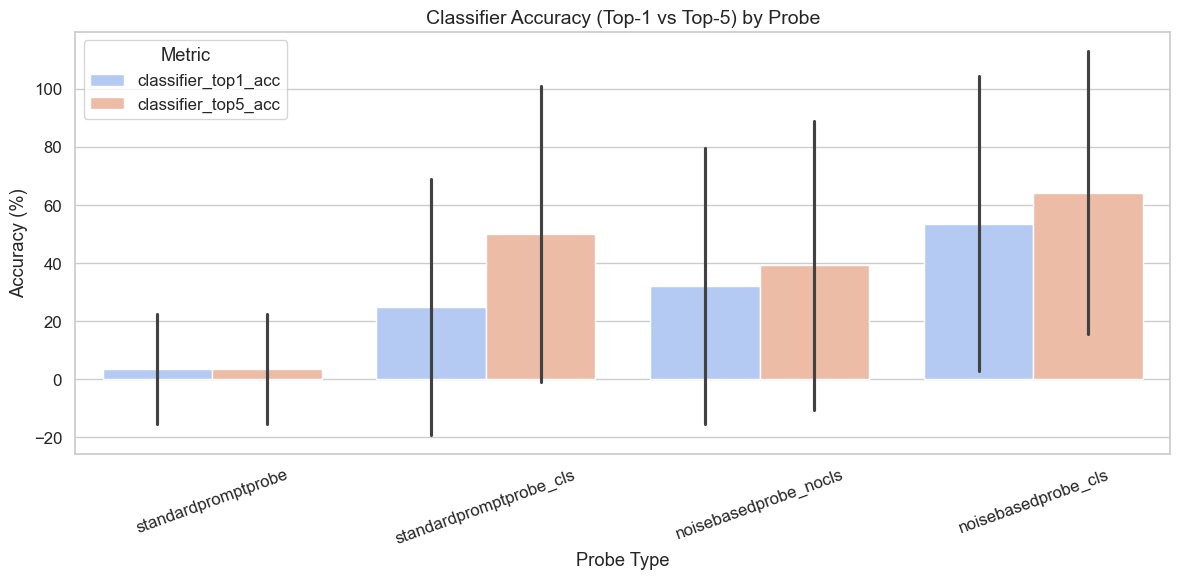

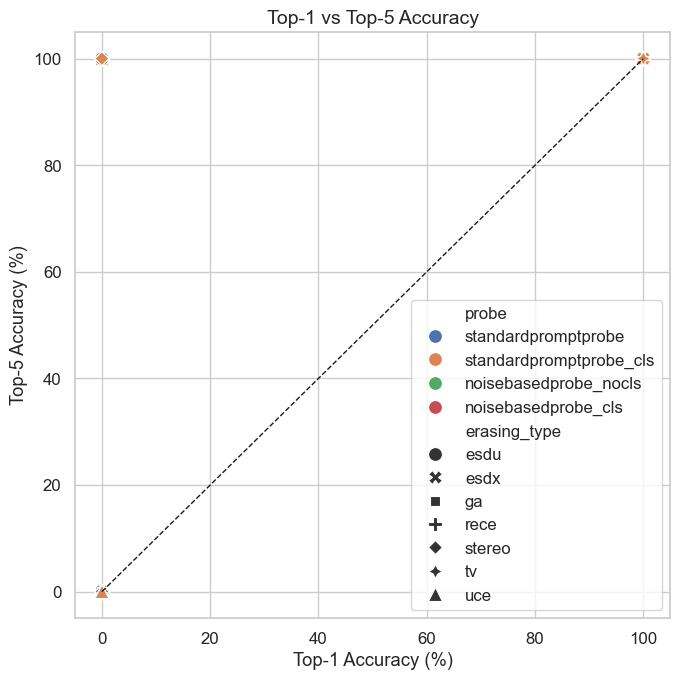

/tmp/ipykernel_3129420/1051460754.py:87: FutureWarning: 

The `ci` parameter is deprecated. Use `errorbar='sd'` for the same effect.

  sns.barplot(


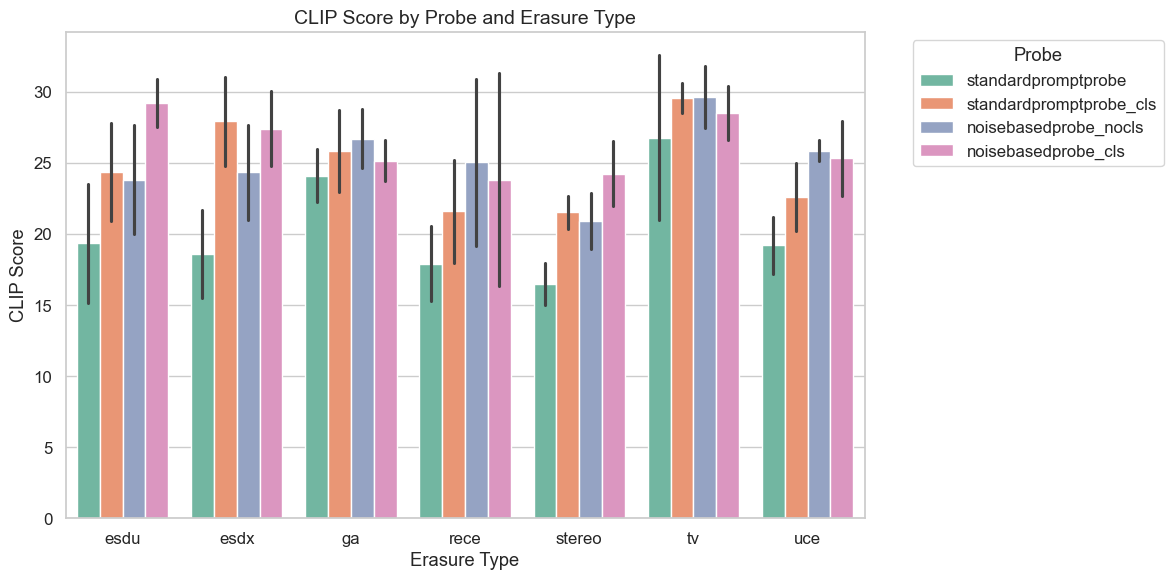

In [9]:
import matplotlib.pyplot as plt
import seaborn as sns

# Optional: set consistent probe order for aesthetics
probe_order = [
    "standardpromptprobe",
    "standardpromptprobe_cls",
    "noisebasedprobe_nocls",
    "noisebasedprobe_cls",
]
df["probe"] = pd.Categorical(df["probe"], categories=probe_order, ordered=True)

sns.set(style="whitegrid", font_scale=1.1)

# ---------------------------------------------------------------------
# 1️⃣ Top-1 vs Top-5 Accuracy side-by-side
# ---------------------------------------------------------------------
plt.figure(figsize=(12, 6))
sns.barplot(
    data=df.melt(
        id_vars=["erasing_type", "concept", "probe"],
        value_vars=["classifier_top1_acc", "classifier_top5_acc"],
        var_name="metric",
        value_name="accuracy"
    ),
    x="erasing_type",
    y="accuracy",
    hue="metric",
    ci="sd",
    palette="Blues"
)
plt.title("Classifier Accuracy (Top-1 vs Top-5) by Erasure Type", fontsize=14)
plt.xlabel("Erasure Type")
plt.ylabel("Accuracy (%)")
plt.legend(title="Metric", loc="upper left")
plt.tight_layout()
plt.show()

# ---------------------------------------------------------------------
# 2️⃣ Compare Top-1 and Top-5 across probes
# ---------------------------------------------------------------------
plt.figure(figsize=(12, 6))
sns.barplot(
    data=df.melt(
        id_vars=["probe", "erasing_type"],
        value_vars=["classifier_top1_acc", "classifier_top5_acc"],
        var_name="metric",
        value_name="accuracy"
    ),
    x="probe",
    y="accuracy",
    hue="metric",
    ci="sd",
    palette="coolwarm"
)
plt.title("Classifier Accuracy (Top-1 vs Top-5) by Probe", fontsize=14)
plt.xlabel("Probe Type")
plt.ylabel("Accuracy (%)")
plt.xticks(rotation=20)
plt.legend(title="Metric", loc="upper left")
plt.tight_layout()
plt.show()

# ---------------------------------------------------------------------
# 3️⃣ Scatter: Top-1 vs Top-5 per (erasing_type, probe, concept)
# ---------------------------------------------------------------------
plt.figure(figsize=(7, 7))
sns.scatterplot(
    data=df,
    x="classifier_top1_acc",
    y="classifier_top5_acc",
    hue="probe",
    style="erasing_type",
    s=100,
)
plt.plot([0, 100], [0, 100], "k--", lw=1)  # diagonal reference
plt.title("Top-1 vs Top-5 Accuracy", fontsize=14)
plt.xlabel("Top-1 Accuracy (%)")
plt.ylabel("Top-5 Accuracy (%)")
plt.tight_layout()
plt.show()

# ---------------------------------------------------------------------
# 4️⃣ (Optional) CLIP score context
# ---------------------------------------------------------------------
plt.figure(figsize=(12, 6))
sns.barplot(
    data=df,
    x="erasing_type",
    y="clip_score",
    hue="probe",
    ci="sd",
    palette="Set2"
)
plt.title("CLIP Score by Probe and Erasure Type", fontsize=14)
plt.xlabel("Erasure Type")
plt.ylabel("CLIP Score")
plt.legend(title="Probe", bbox_to_anchor=(1.05, 1), loc="upper left")
plt.tight_layout()
plt.show()